In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos libreriras, leemos archivo CSV y sacamos la primera informacion del dataframe con funciones info, head, describe y shape

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
bmw = pd.read_csv("/content/drive/MyDrive/bmw_pricing_v2 2.csv")

Analizamos duplicados. 

In [ ]:
col = bmw.columns
print('Number of columns :', len(col))

Number of columns : 18


In [ ]:
count = bmw.isnull().sum().sum()
print('Number of NaN values present:' +str(count))

Number of NaN values present:62


In [ ]:
bmw.duplicated().sum()

0

In [ ]:
bmw.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4842
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4809 non-null   object 
 1   km                           4809 non-null   float64
 2   potencia                     4809 non-null   float64
 3   tipo_gasolina                4809 non-null   object 
 4   color                        4809 non-null   object 
 5   tipo_coche                   4809 non-null   object 
 6   volante_regulable            4809 non-null   object 
 7   aire_acondicionado           4809 non-null   object 
 8   camara_trasera               4809 non-null   object 
 9   asientos_traseros_plegables  4809 non-null   object 
 10  elevalunas_electrico         4809 non-null   object 
 11  bluetooth                    4809 non-null   object 
 12  gps                          4809 non-null   bool   
 13  alerta_lim_velocid

In [ ]:
bmw[bmw.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
bmw.isnull().sum()/len(bmw)*100

marca                          0.041297
modelo                         0.061945
km                             0.041297
potencia                       0.020648
fecha_registro                 0.020648
tipo_gasolina                  0.103242
color                          0.247780
tipo_coche                     0.185835
volante_regulable              0.082593
aire_acondicionado             0.041297
camara_trasera                 0.041297
asientos_traseros_plegables    0.082593
elevalunas_electrico           0.041297
bluetooth                      0.082593
gps                            0.000000
alerta_lim_velocidad           0.041297
precio                         0.123890
fecha_venta                    0.020648
dtype: float64

No hay duplicados en el dataframe

Analizamos los nulos

In [ ]:
bmw["marca"].value_counts()


BMW    4841
Name: marca, dtype: int64

In [ ]:
del(bmw["marca"])

Decidimos quitar la columna de marca, ya que todos los datos son iguales.

In [ ]:
bmw[bmw['color'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
239,318,132731.0,100.0,2013-09-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01
834,318,148429.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01
855,318,139736.0,100.0,2009-02-01,diesel,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01
864,318,157661.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01
884,320,145981.0,122.0,2013-07-01,diesel,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01
904,320,126425.0,120.0,2013-07-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01
939,520,153102.0,140.0,2015-04-01,diesel,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01
1569,318,191804.0,100.0,2013-10-01,diesel,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01
1591,320,130624.0,120.0,2013-07-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01
1612,330,23811.0,190.0,2015-12-01,diesel,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01


In [ ]:
bmw[bmw['tipo_coche'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
243,318,144727.0,105.0,2014-04-01,diesel,white,NaN,False,True,True,False,True,True,True,True,14300.0,2018-06-01
424,520,271181.0,100.0,2002-05-01,diesel,blue,NaN,True,False,False,False,False,False,True,False,800.0,2018-02-01
3621,316,171640.0,85.0,2012-07-01,diesel,white,NaN,True,False,False,False,False,False,True,False,10800.0,2018-09-01
3632,116,123064.0,85.0,2004-10-01,petrol,black,NaN,False,False,False,False,False,False,True,False,2400.0,2018-05-01
3634,118,224562.0,100.0,2007-07-01,diesel,black,NaN,False,False,False,False,False,False,True,False,3800.0,2018-06-01
3654,116,156610.0,85.0,2005-01-01,petrol,grey,NaN,False,False,True,False,False,True,True,False,3600.0,2018-02-01
3716,118,181781.0,100.0,2013-10-01,diesel,grey,NaN,True,True,True,False,False,True,True,False,9500.0,2018-05-01
3747,X1,61354.0,105.0,2013-11-01,diesel,blue,NaN,False,False,False,False,False,False,False,True,16900.0,2018-06-01
4842,525,195840.0,160.0,2013-01-01,diesel,grey,NaN,True,True,False,False,True,False,True,True,15500.0,2018-09-01


In [ ]:
bmw["color"].fillna('sin color', inplace=True)

In [ ]:
bmw["tipo_coche"].fillna('sin especificar', inplace=True)

In [ ]:
bmw["tipo_gasolina"].fillna('sin especificar', inplace=True)

In [ ]:
bmw.dropna(inplace=True)

In [ ]:
bmw.isnull().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

En las categoricas, sustituyo en las variables con mayor frequencia de nulos una nueva etiqueta. En las demás, elimino todos los nulos

Cambiamos el dtype de fecha_registro y fecha_venta, de object a datatime

In [ ]:
lista_fechas=["fecha_registro","fecha_venta"]

In [ ]:
for i in lista_fechas:
  bmw[i]=pd.to_datetime(bmw[i])

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4809 non-null   object        
 1   km                           4809 non-null   float64       
 2   potencia                     4809 non-null   float64       
 3   fecha_registro               4809 non-null   datetime64[ns]
 4   tipo_gasolina                4809 non-null   object        
 5   color                        4809 non-null   object        
 6   tipo_coche                   4809 non-null   object        
 7   volante_regulable            4809 non-null   object        
 8   aire_acondicionado           4809 non-null   object        
 9   camara_trasera               4809 non-null   object        
 10  asientos_traseros_plegables  4809 non-null   object        
 11  elevalunas_electrico         4809 non-null 

Separamos los valores de los datos de fechas en día, mes año y nombre día.

In [ ]:
for col in ['fecha_registro', 'fecha_venta']:
        bmw[col + '_NOMBREDIA'] = bmw[col].dt.day_name()
        bmw[col + '_DIA'] = bmw[col].dt.day
        bmw[col + '_MES'] = bmw[col].dt.month
        bmw[col + '_AÑO'] = bmw[col].dt.year
    

bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta,fecha_registro_NOMBREDIA,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,...,11300.0,2018-01-01,Wednesday,1,2,2012,Monday,1,1,2018
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,...,69700.0,2018-02-01,Friday,1,4,2016,Thursday,1,2,2018
2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,...,10200.0,2018-02-01,Sunday,1,4,2012,Thursday,1,2,2018
3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,...,25100.0,2018-02-01,Tuesday,1,7,2014,Thursday,1,2,2018
4,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,...,33400.0,2018-04-01,Monday,1,12,2014,Sunday,1,4,2018


Eliminamos fecha registro y fecha venta proque ya tenemos esos datos desglosados 

In [ ]:
del(bmw["fecha_registro"])
del(bmw["fecha_venta"])

In [ ]:
target = ["precio"]
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]
  for i in dataset:
    if ( (dataset[i].dtype.kind=="f") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())!=2):
      lista_numericas.append(i)
    elif ( (dataset[i].dtype.kind=="b") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())==2):
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind=="O") & (i not in target):
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas=obtener_lista_variables(bmw)

In [ ]:
lista_numericas

['km',
 'potencia',
 'fecha_registro_DIA',
 'fecha_registro_MES',
 'fecha_registro_AÑO',
 'fecha_venta_DIA',
 'fecha_venta_MES',
 'fecha_venta_AÑO']

In [ ]:
lista_boolean

['gps']

In [ ]:
lista_categoricas

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_registro_NOMBREDIA',
 'fecha_venta_NOMBREDIA']

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c47a3e20>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c4d281c0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c4ed6850>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c4e975e0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c4519f10>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c46d3730>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c4358f10>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c463c730>]]


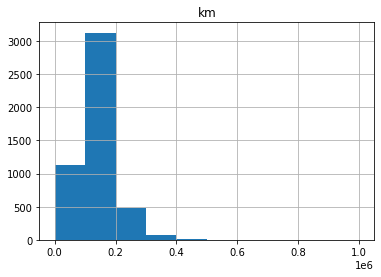

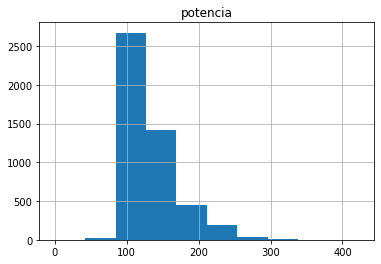

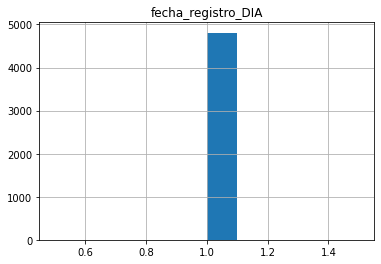

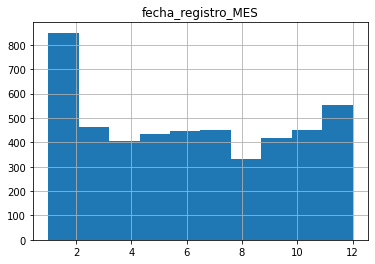

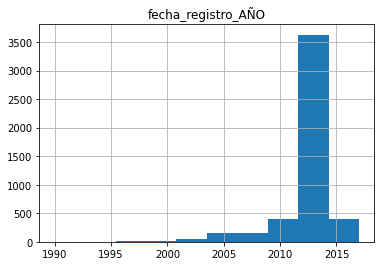

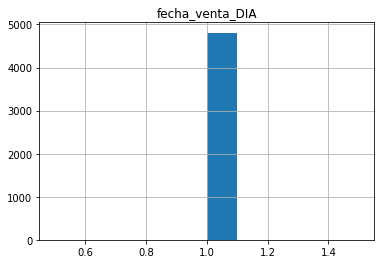

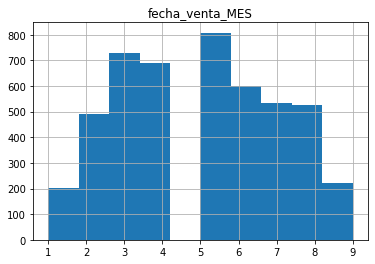

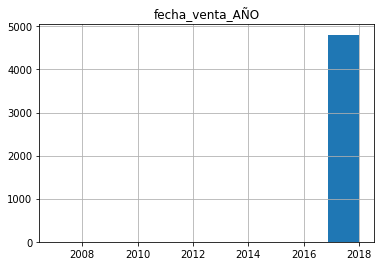

In [ ]:
for i in lista_numericas:
  print(bmw.hist(i)) 

A simple vista parece que tres columnas solo hay un valor, pero decidimos comrpovarlo

In [ ]:
num_bmw = bmw[bmw.columns[bmw.columns.isin(lista_numericas)]]

In [ ]:
num_bmw.loc[:, num_bmw.nunique() ==1]

,fecha_registro_DIA,fecha_venta_DIA
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
4838,1,1
4839,1,1
4840,1,1
4841,1,1


Vemos que solo hay realmente dos columnas con un valor, aún así fecha año solo hay dos nievles, por lo tanto no creemos que sea muy determinante. Por otro lado, decidimos eliminar fecha_venta_mes ya que no presneta valores entre el més de abril a mayo.

In [ ]:
del(bmw["fecha_venta_DIA"])
del(bmw["fecha_venta_AÑO"])
del(bmw["fecha_registro_DIA"])
del(bmw["fecha_venta_MES"])

Ahora analizamos las demás columns numéricas. Emepzamos por km

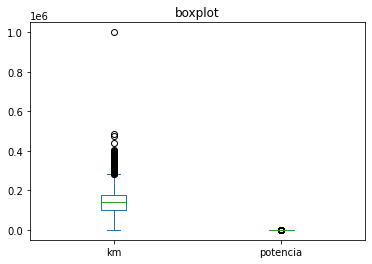

In [ ]:
ax = bmw[['km', 'potencia']].plot(kind='box', title='boxplot')

plt.show()

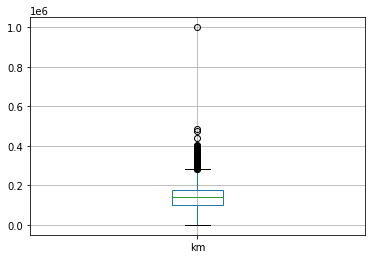

In [ ]:
bmw.boxplot('km')

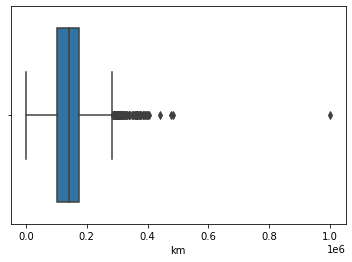

In [ ]:
sns.boxplot(x="km",data=bmw)

Hay un outlier muy alejado de los otros, así que lo eliminamos ya que aunque sea posible, no es representativo y afecta a la distribución del modelo

In [ ]:
bmw[bmw['km']>1e6]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES
3732,118,1000376.0,90.0,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400.0,Tuesday,2005,Friday,6


In [ ]:
bmw.drop(bmw[bmw["km"]>1e6].index,inplace=True)

In [ ]:
bmw["km"].describe()

count      4808.000000
mean     140683.844218
std       58889.152578
min         -64.000000
25%      102718.250000
50%      140866.500000
75%      175184.750000
max      484615.000000
Name: km, dtype: float64

Al ver que hay minimo negativo, eliminamos todos los valores con km inferiores a 0. En este caso solo hay uno.

In [ ]:
bmw[bmw['km']<0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES
2938,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,Wednesday,2017,Sunday,4


Antes hemos analizado si hay muha diferencia entre eliminar el valor o sustituirlo por la media:

In [ ]:
bmw_mean = bmw.copy()

In [ ]:
bmw_mean['km']= np.where(bmw_mean['km']<0,bmw_mean["km"].mean(),bmw_mean['km'])

In [ ]:
bmwa = bmw.copy()

In [ ]:
bmwa.drop(bmwa[bmwa["km"]<0].index,inplace=True)

Eliminamos la fila con el valor negativo de Km

In [ ]:
print(bmw_mean['km'].mean())
print(bmwa['km'].mean())
print(bmw['km'].mean())

140891.91632596415
140713.12398585398
140683.84421797004


En este caso, altera más poner la media que eliminar el valor, aunque la diferencia no es para nada significativa 

In [ ]:
a = bmw['km']
b = bmw_mean['km']
c = bmwa['km']

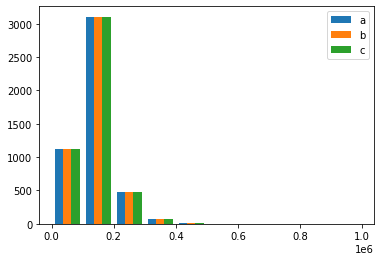

In [ ]:
plt.hist([a, b,c], bins=10, label=['a', 'b','c'])
plt.legend(loc='upper right')
plt.show()

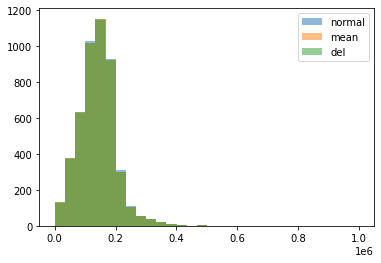

In [ ]:
import numpy
from matplotlib import pyplot



pyplot.hist(bmw['km'], bins = 30, alpha=0.5, label='normal')
pyplot.hist(bmw_mean['km'], bins = 30, alpha=0.5, label='mean')
pyplot.hist(bmwa['km'],bins =30, alpha=0.5, label='del')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
bmw.drop(bmw[bmw["km"]<0].index,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb64b2f940>]],
      dtype=object)

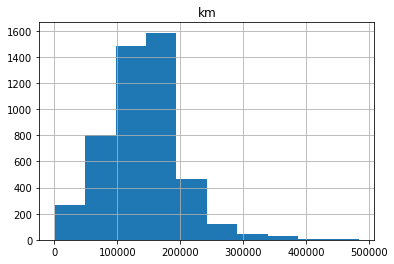

In [ ]:
bmw.hist('km')

La variable km ya presenta una distribución normal así que tampoco sería necesaria hacer un logaritmo. Aún así lo hacemos para observar como cambia la distribución.

In [ ]:
bmw["log_km"]=np.log10(bmw["km"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c77f45b0>]],
      dtype=object)

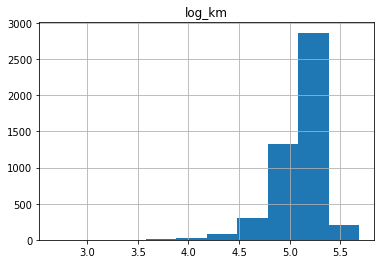

In [ ]:
bmw.hist('log_km')

In [ ]:
from scipy.stats import kurtosis
print(kurtosis(bmw['km'], axis=0, bias=True))
print(kurtosis(bmw['log_km'], axis=0, bias=True))
from scipy.stats import skew
print(skew(bmw['km'], axis=0, bias=True))
print(skew(bmw['log_km'], axis=0, bias=True))


1.7206299289094993
10.455021606146776
0.5854112309896466
-2.132115959194436


En este caso, vemos que es mejor mantener la variable km sin el logaritmo

In [ ]:
del(bmw['log_km'])

Ahora analizamos la columna potencia

In [ ]:
bmw["potencia"].describe()

count    4782.000000
mean      129.063781
std        39.056006
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

In [ ]:
bmw[bmw["potencia"]<50]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES
1796,i3,152328.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,Saturday,2014,Sunday,4
1925,i3,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,Saturday,2014,Thursday,3
3765,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,Wednesday,2014,Thursday,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fa9300a60>]],
      dtype=object)

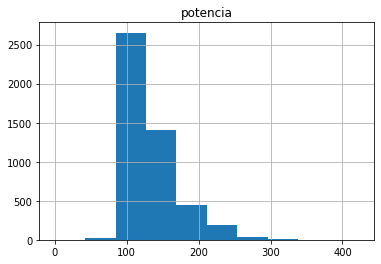

In [ ]:
bmw.hist("potencia")

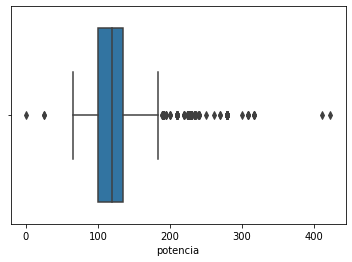

In [ ]:
sns.boxplot(x="potencia",data=bmw)

In [ ]:
bmwa.drop(bmwa[bmwa["potencia"]>350].index,inplace=True)

In [ ]:
bmwa.drop(bmwa[bmwa["potencia"]<50].index,inplace=True)

In [ ]:
bmw_mean['potencia']= np.where(bmw_mean['potencia']>350,bmw_mean["potencia"].mean(),bmw_mean['potencia'])

In [ ]:
bmw_mean['potencia']= np.where(bmw_mean['potencia']<50,bmw_mean["potencia"].mean(),bmw_mean['potencia'])

In [ ]:
import matplotlib.pyplot as plt


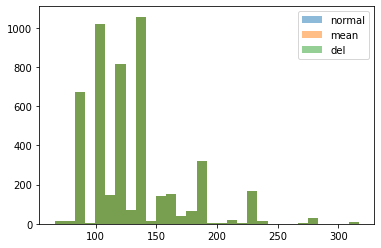

In [ ]:
plt.hist(bmw['potencia'], bins = 30, alpha=0.5, label='normal')
plt.hist(bmw_mean['potencia'], bins = 30, alpha=0.5, label='mean')
plt.hist(bmwa['potencia'],bins =30, alpha=0.5, label='del')
plt.legend(loc='upper right')
plt.show()

In [ ]:

  print('La media es:',bmw['potencia'].mean())
  print('La media con del es:',bmwa['potencia'].mean())
  print('La media con cambio de media es:',bmw_mean['potencia'].mean())


La media es: 128.93167221637503
La media con del es: 128.93167221637503
La media con cambio de media es: 128.93167221637503


In [ ]:
bmw['potencia']= np.where(bmw['potencia']>350,bmw["potencia"].mean(),bmw['potencia'])
bmw['potencia']= np.where(bmw['potencia']<50,bmw["potencia"].mean(),bmw['potencia'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb64b5d940>]],
      dtype=object)

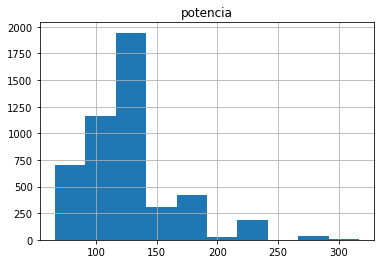

In [ ]:
bmw.hist("potencia")

In [ ]:
bmw["log_potencia"]=np.log10(bmw["potencia"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb655f84c0>]],
      dtype=object)

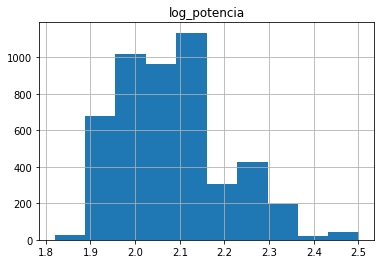

In [ ]:
bmw.hist('log_potencia')

Transformamos a logaritmica potencia ya que parece tener una distribucion exponencial, la normalizamos

Al anlizar la simetria y curtosis,vemos que al aplicar el logaritmo obtenemos valores muy cercanos a 0. Nos quedamos con el logaritmo

In [ ]:
from scipy.stats import kurtosis
print(kurtosis(bmw['potencia'], axis=0, bias=True))
print(kurtosis(bmw['log_potencia'], axis=0, bias=True))



2.386231497307892
0.16457271791125594


In [ ]:
from scipy.stats import skew
print(skew(bmw['potencia'], axis=0, bias=True))
print(skew(bmw['log_potencia'], axis=0, bias=True))


1.4145185094728072
0.6272113611099992


Eliminamos la columna Fecha registro dia, fecha venta dia, fecha venta año y fecha venta mes por tener periodos donde no tenemos ningun dato. 

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 0 to 4841
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4779 non-null   object 
 1   km                           4779 non-null   float64
 2   potencia                     4779 non-null   float64
 3   tipo_gasolina                4779 non-null   object 
 4   color                        4779 non-null   object 
 5   tipo_coche                   4779 non-null   object 
 6   volante_regulable            4779 non-null   object 
 7   aire_acondicionado           4779 non-null   object 
 8   camara_trasera               4779 non-null   object 
 9   asientos_traseros_plegables  4779 non-null   object 
 10  elevalunas_electrico         4779 non-null   object 
 11  bluetooth                    4779 non-null   object 
 12  gps                          4779 non-null   bool   
 13  alerta_lim_velocid

In [ ]:
del(bmw['fecha_venta_DIA'])

In [ ]:
del(bmw['fecha_registro_DIA'])

In [ ]:
del(bmw['fecha_venta_MES'])

In [ ]:
del(bmw['fecha_venta_AÑO'])

In [ ]:
del(bmw['potencia'])

In [ ]:
corr = bmw.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,gps,precio,fecha_registro_MES,fecha_registro_AÑO,log_potencia
km,1.000000,0.157684,-0.412608,-0.015420,-0.508252,-0.024758
gps,0.157684,1.000000,-0.007683,-0.014882,-0.071870,-0.008881
precio,-0.412608,-0.007683,1.000000,-0.015805,0.449710,0.614448
fecha_registro_MES,-0.015420,-0.014882,-0.015805,1.000000,-0.071549,-0.000416
fecha_registro_AÑO,-0.508252,-0.071870,0.449710,-0.071549,1.000000,0.083505
log_potencia,-0.024758,-0.008881,0.614448,-0.000416,0.083505,1.000000


No se observa correlacion entre las variables numericas. 

Analizaremos las variables categoricas

ANALISIS CATEGORICAS

In [ ]:
for i in lista_categoricas:
  print(bmw[i].value_counts()) 

320                743
520                627
318                562
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64
diesel             4595
petrol              191
hybrid_petrol         8
sin especificar       5
Diesel                5
electro               3
Name: tipo_gasolina, dtype: int64
black        1617
grey         1166
blue          701
white         531
brown         340
silver        324
red            51
beige          41
green          18
sin color      12
orange          6
Name: color, dtype: int64
estate             1580
sedan              1166
suv                1056
hatchback           699
subcompact          112
coupe                97
convertible          47
van                  41
sin especificar       9
Name: tipo_coche, dtype: int64
True     2644
False    2163
Name: volante_regulable, dtype:

Decidimos manterner igual los datos de todas las variables, a exepcion de tipo de gasolina que unificamos Diesel y diesel y eliminamos aquellas filas con valores tipo_gasolina = False. Asumimos que es un error.

In [ ]:
bmw["tipo_gasolina"]=np.where(bmw["tipo_gasolina"]=="Diesel",bmw["tipo_gasolina"]=="diesel",bmw["tipo_gasolina"])

In [ ]:
bmw["tipo_gasolina"].value_counts()

diesel             4595
petrol              191
hybrid_petrol         8
sin especificar       5
False                 5
electro               3
Name: tipo_gasolina, dtype: int64

In [ ]:
bmw1 = bmw.copy()
bmw1['modelo'].value_counts()

320                743
520                627
318                562
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [ ]:
bmw1['modelo'].mask(bmw1["modelo"].str.contains('Turismo',na=False),"Gran Turismo", inplace=True)

In [ ]:
bmw1['modelo'].mask(bmw1["modelo"].str.contains('Tourer',na=False),"Tourer", inplace=True)

In [ ]:
bmw1['modelo'].mask(bmw1["modelo"].str.contains('Coupé',na=False),"Coupé", inplace=True)

In [ ]:
bmw1['modelo'].mask(bmw1["modelo"].str.startswith('M',na=False),"Modelo_M", inplace=True)

In [ ]:
bmw1['modelo'].mask(bmw1["modelo"].str.startswith('i',na=False),"Modelo_i", inplace=True)

In [ ]:
bmw1['modelo'].mask(bmw1["modelo"].str.startswith('X',na=False),"Modelo_X", inplace=True)

In [ ]:
bmw1['modelo'].mask(bmw1["modelo"].str.startswith('7',na=False),"Modelo_numerico", inplace=True)

In [ ]:
bmw['modelo'].mask(a['modelo'].str.isdigit(),"Modelo_numerico",inplace=True)

In [ ]:
bmw1['modelo'].value_counts()

Modelo_numerico    3382
Modelo_X           1060
Gran Turismo        223
Coupé                69
Tourer               33
Modelo_M             26
Modelo_i              7
Z4                    6
ActiveHybrid 5        1
Name: modelo, dtype: int64

In [ ]:
bmw1['tipo_gasolina'].value_counts()

diesel             4595
petrol              191
hybrid_petrol         8
sin especificar       5
False                 5
electro               3
Name: tipo_gasolina, dtype: int64

In [ ]:
bmw1.drop(bmw1[bmw1["tipo_gasolina"]==False].index,inplace=True)

In [ ]:
bmw1["tipo_gasolina"].value_counts()

diesel             4595
petrol              191
hybrid_petrol         8
sin especificar       5
electro               3
Name: tipo_gasolina, dtype: int64

Analizamos la variable Precio

In [ ]:
bmw1["precio"].describe()

count      4802.000000
mean      15839.629321
std        9192.102292
min         100.000000
25%       10900.000000
50%       14200.000000
75%       18675.000000
max      178500.000000
Name: precio, dtype: float64

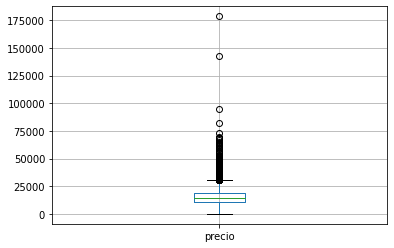

In [ ]:
bmw1.boxplot('precio')

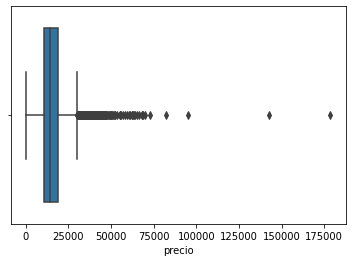

In [ ]:
sns.boxplot(x="precio",data=bmw1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


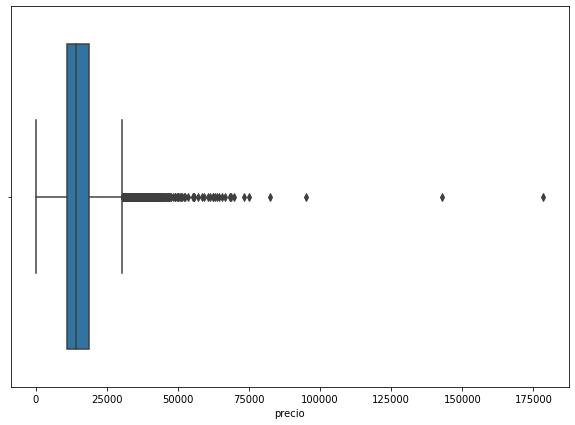

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
fig = plt.figure(figsize =(10, 7))
 
 
# Creating plot
bp = sns.boxplot(bmw1['precio'])
 
# show plot
plt.show()

In [ ]:
bmw1['precio'].mean()

15876.935956467141

In [ ]:
bmw1['precio'].median()

14200.0

In [ ]:
bmw1.drop(bmw1[bmw1["precio"]<3000].index,inplace=True)

In [ ]:
bmw1.drop(bmw1[bmw1["precio"]>80000].index,inplace=True)

Eliminamos los precios menores a 3000 y mayores a 100000.





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c2873f40>]],
      dtype=object)

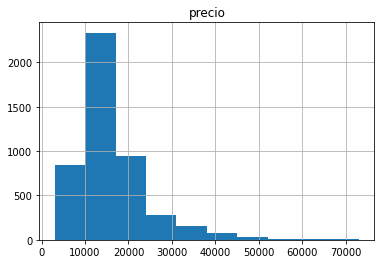

In [ ]:
bmw1.hist("precio")

In [ ]:
bmw1["precio"].describe()

count     4689.000000
mean     16089.123480
std       8369.246601
min       3000.000000
25%      11100.000000
50%      14300.000000
75%      18800.000000
max      73100.000000
Name: precio, dtype: float64

In [ ]:
bmw1["log_precio"]=np.log10(bmw1["precio"])

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [ ]:
print(skew(bmw1['precio'], axis=0, bias=True))
print(skew(bmw1['log_precio'], axis=0, bias=True))

1.9495893911571136
-0.13927526546526464


In [ ]:
print(kurtosis(bmw1['precio'], axis=0, bias=True))
print(kurtosis(bmw1['log_precio'], axis=0, bias=True))

6.025016670749391
0.9052097824821272


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c27da760>]],
      dtype=object)

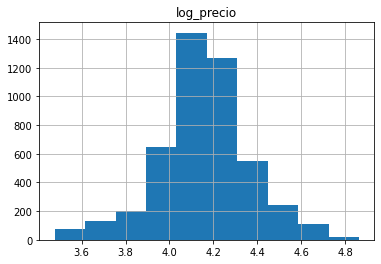

In [ ]:
bmw1.hist("log_precio")

Los valores de log_precio, presentan una distribucion mas normal,menos asimetria y mayor concentracion de valores en el centro

In [ ]:
corr = bmw1.corr()

In [ ]:
corr = bmw1.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,gps,precio,fecha_registro_MES,fecha_registro_AÑO,log_potencia,log_precio
km,1.000000,0.169490,-0.410724,-0.018798,-0.481987,-0.000959,-0.437738
gps,0.169490,1.000000,-0.014670,-0.019542,-0.102319,-0.017292,-0.021835
precio,-0.410724,-0.014670,1.000000,-0.016829,0.464213,0.660062,0.925605
fecha_registro_MES,-0.018798,-0.019542,-0.016829,1.000000,-0.097312,-0.000167,-0.018633
fecha_registro_AÑO,-0.481987,-0.102319,0.464213,-0.097312,1.000000,0.031775,0.594889
log_potencia,-0.000959,-0.017292,0.660062,-0.000167,0.031775,1.000000,0.617959
log_precio,-0.437738,-0.021835,0.925605,-0.018633,0.594889,0.617959,1.000000


In [ ]:
le = LabelEncoder()

In [ ]:
bmw2=bmw1.copy()

In [ ]:
bmw2=pd.get_dummies(data=bmw2,columns = lista_categoricas)

In [ ]:
bmw2=pd.get_dummies(data=bmw2,columns = lista_boolean)

In [ ]:
bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689 entries, 0 to 4842
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   km                                  4689 non-null   float64
 1   precio                              4689 non-null   float64
 2   fecha_registro_MES                  4689 non-null   int64  
 3   fecha_registro_AÑO                  4689 non-null   int64  
 4   log_potencia                        4689 non-null   float64
 5   log_precio                          4689 non-null   float64
 6   modelo_ActiveHybrid 5               4689 non-null   uint8  
 7   modelo_Coupé                        4689 non-null   uint8  
 8   modelo_Gran Turismo                 4689 non-null   uint8  
 9   modelo_Modelo_M                     4689 non-null   uint8  
 10  modelo_Modelo_X                     4689 non-null   uint8  
 11  modelo_Modelo_i                     4689 no

In [ ]:
corr = bmw2.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,precio,fecha_registro_MES,fecha_registro_AÑO,log_potencia,log_precio,modelo_ActiveHybrid 5,modelo_Coupé,modelo_Gran Turismo,modelo_Modelo_M,modelo_Modelo_X,modelo_Modelo_i,modelo_Modelo_numerico,modelo_Tourer,modelo_Z4,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,tipo_gasolina_sin especificar,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_sin color,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin especificar,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,volante_regulable_False,volante_regulable_True,aire_acondicionado_False,aire_acondicionado_True,camara_trasera_False,camara_trasera_True,asientos_traseros_plegables_False,asientos_traseros_plegables_True,elevalunas_electrico_False,elevalunas_electrico_True,bluetooth_False,bluetooth_True,alerta_lim_velocidad_False,alerta_lim_velocidad_True,fecha_registro_NOMBREDIA_Friday,fecha_registro_NOMBREDIA_Monday,fecha_registro_NOMBREDIA_Saturday,fecha_registro_NOMBREDIA_Sunday,fecha_registro_NOMBREDIA_Thursday,fecha_registro_NOMBREDIA_Tuesday,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_False,gps_True
km,1.000000,-0.410724,-0.018798,-0.481987,-0.000959,-0.437738,-0.011476,-0.096451,0.009885,-0.032293,-0.102593,-0.038950,0.141633,-0.095591,-0.021693,0.069210,-0.039373,-0.026280,-0.059320,-0.011898,-0.016843,0.052141,-0.034668,-0.017303,0.027308,0.030966,-0.031659,-0.024998,0.006341,0.005527,-0.061777,-0.035418,-0.069906,0.185843,-0.110542,0.053377,0.015827,-0.046443,-0.101431,-0.098469,-0.079904,0.079904,-0.073935,0.073935,-0.008426,0.008426,0.038708,-0.038708,-0.073574,0.073574,0.021578,-0.021578,0.014271,-0.014271,0.006673,-0.001916,-0.026379,0.007293,-0.012681,0.016738,0.010325,-0.003911,0.022173,-0.008362,0.010161,-0.004842,-0.012265,0.002855,-0.169490,0.169490
precio,-0.410724,1.000000,-0.016829,0.464213,0.660062,0.925605,0.008745,0.178557,0.032609,0.183260,0.335468,0.021504,-0.395149,-0.004982,-0.028184,-0.003164,0.014748,0.061239,-0.010823,-0.004301,-0.003053,0.024363,-0.029166,-0.022585,-0.040790,-0.026898,0.011880,-0.003716,-0.007568,-0.019606,0.067677,0.023969,0.105699,-0.214501,-0.132185,0.021416,-0.025231,-0.112540,0.336115,-0.009534,-0.278799,0.278799,-0.224750,0.224750,-0.265664,0.265664,-0.446954,0.446954,-0.269234,0.269234,-0.228580,0.228580,-0.469003,0.469003,-0.018573,-0.029317,0.018556,0.001853,-0.015742,0.023265,0.018845,-0.018083,-0.017055,-0.008058,-0.008615,0.006065,0.013048,0.023471,0.014670,-0.014670
fecha_registro_MES,-0.018798,-0.016829,1.000000,-0.097312,-0.000167,-0.018633,-0.005047,0.027885,-0.027560,0.002837,0.006743,-0.024990,-0.002155,0.019478,-0.005158,0.026068,-0.026586,-0.001677,-0.018761,-0.031684,0.004926,-0.005413,0.016545,0.028208,-0.005964,-0.033760,0.025491,0.025043,-0.007731,-0.000921,0.007393,-0.020934,-0.008503,-0.011163,0.045242,-0.023279,-0.003347,-0.016957,0.007126,0.022995,0.036753,-0.036753,-0.006943,0.006943,-0.026395,0.026395,0.019071,-0.019071,0.010634,-0.010634,0.006730,-0.006730,0.001776,-0.001776,-0.057665,0.147093,-0.035958,0.037145,0.069005,-0.059374,-0.099525,0.012221,0.004409,-0.015099,0.003266,-0.001578,-0.002204,-0.005292,0.019542,-0.019542
fecha_registro_AÑO,-0.481987,0.464213,-0.097312,1.000000,0.031775,0.594889,-0.004343,0.104474,0.107674,0.003772,0.002769,0.026278,-0.091848,0.097635,-0.107212,0.143342,0.016568,0.022688,-0.157188,0.012552,0.004787,-0.032516,0.021319,0.029107,-0.096782,-0.072342,0.017757,0.025234,-0.041823,0.009052,0.135879,-0.083705,-0.000520,0.005450,0.064839,-0.054727,-0.029908,-0.020947,0.002986,0.100213,0.102609,-0.102609,-0.147199,0.147199,0.038963,-0.038963,-0.033980,0.033980,-0.059949,0.059949,-0.068758,0.068

In [ ]:
df = pd.DataFrame(data = bmw2)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))


Top Absolute Correlations
aire_acondicionado_False           aire_acondicionado_True             1.000000
gps_False                          gps_True                            1.000000
bluetooth_False                    bluetooth_True                      1.000000
camara_trasera_False               camara_trasera_True                 1.000000
asientos_traseros_plegables_False  asientos_traseros_plegables_True    1.000000
elevalunas_electrico_False         elevalunas_electrico_True           1.000000
alerta_lim_velocidad_False         alerta_lim_velocidad_True           1.000000
volante_regulable_False            volante_regulable_True              1.000000
modelo_Modelo_X                    tipo_coche_suv                      0.996926
tipo_gasolina_diesel               tipo_gasolina_petrol                0.962237
dtype: float64


De las variables que tienen correlacion >0,9 elimino una de las variables.


In [ ]:
bmw3=bmw2.copy()

In [ ]:
del(bmw3["tipo_gasolina_petrol"])
del(bmw3["volante_regulable_False"])
del(bmw3["aire_acondicionado_False"])
del(bmw3["gps_False"])
del(bmw3["alerta_lim_velocidad_False"])
del(bmw3["bluetooth_False"])
del(bmw3["elevalunas_electrico_False"])
del(bmw3["asientos_traseros_plegables_False"])
del(bmw3["camara_trasera_False"])
del(bmw3["modelo_Modelo_X"])




In [ ]:
bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689 entries, 0 to 4842
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   km                                  4689 non-null   float64
 1   precio                              4689 non-null   float64
 2   fecha_registro_MES                  4689 non-null   int64  
 3   fecha_registro_AÑO                  4689 non-null   int64  
 4   log_potencia                        4689 non-null   float64
 5   log_precio                          4689 non-null   float64
 6   modelo_ActiveHybrid 5               4689 non-null   uint8  
 7   modelo_Coupé                        4689 non-null   uint8  
 8   modelo_Gran Turismo                 4689 non-null   uint8  
 9   modelo_Modelo_M                     4689 non-null   uint8  
 10  modelo_Modelo_i                     4689 non-null   uint8  
 11  modelo_Modelo_numerico              4689 no

Voy a normalizar mis datos, dejarlos entre 0 y1 para poder comparar los datos. 

In [ ]:
minMaxScaler = MinMaxScaler()

In [ ]:
bmw4=bmw3.copy()

In [ ]:
del(bmw4["precio"])

In [ ]:
bmw4["km"]=minMaxScaler.fit_transform(bmw4["km"].values.reshape(-1,1))

In [ ]:
bmw4["log_potencia"]=minMaxScaler.fit_transform(bmw4["log_potencia"].values.reshape(-1,1))

In [ ]:
bmw4["log_precio"]=minMaxScaler.fit_transform(bmw4["log_precio"].values.reshape(-1,1))

In [ ]:
bmw4["fecha_registro_MES"]=minMaxScaler.fit_transform(bmw4["fecha_registro_MES"].values.reshape(-1,1))

In [ ]:
bmw4["fecha_registro_AÑO"]=minMaxScaler.fit_transform(bmw4["fecha_registro_AÑO"].values.reshape(-1,1))

In [ ]:
bmw4.head()

,km,fecha_registro_MES,fecha_registro_AÑO,log_potencia,log_precio,modelo_ActiveHybrid 5,modelo_Coupé,modelo_Gran Turismo,modelo_Modelo_M,modelo_Modelo_i,...,fecha_registro_NOMBREDIA_Tuesday,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True
0,0.289039,0.090909,0.761905,0.236145,0.415315,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0.027787,0.272727,0.952381,1.000000,0.985085,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0.377621,0.272727,0.761905,0.356855,0.383242,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.263476,0.545455,0.857143,0.434836,0.665240,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,0.199573,1.000000,0.857143,0.547322,0.754707,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
bmw4.reset_index(inplace=True, drop=True)

In [ ]:
bmw4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Columns: 125 entries, fecha_registro_MES to log_potencia
dtypes: float64(6), uint8(119)
memory usage: 753.6 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= bmw4.drop("log_precio",axis=1)

In [ ]:
x.head()

,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,...,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True,log_km,log_potencia
0,0.090909,0.761905,0.000,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0.821133,0.280192
1,0.272727,0.761905,0.125,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.859617,0.423418
2,0.545455,0.857143,0.125,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.807810,0.515944
3,1.000000,0.857143,0.375,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.767872,0.649412
4,0.363636,0.714286,0.125,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.832918,0.917232


In [ ]:
y= bmw4["log_precio"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=12)

In [ ]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 3282
Test data instances: 1407


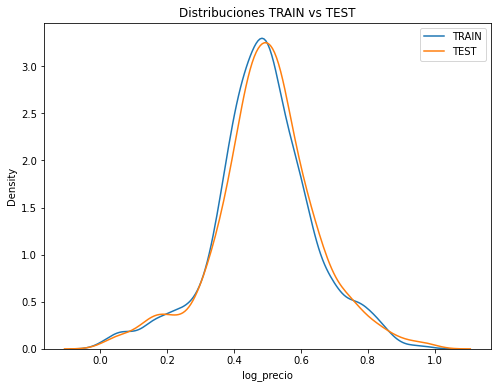

In [ ]:
plt.figure(figsize=[8,6])
sns.kdeplot(y_train,label='TRAIN')
sns.kdeplot(y_test,label='TEST')
plt.title('Distribuciones TRAIN vs TEST')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg= LinearRegression()

In [ ]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_test

,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,...,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True,log_km,log_potencia
4549,0.181818,0.761905,1.000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.820087,0.280192
2027,0.090909,0.857143,0.500,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0.847972,0.152523
1633,1.000000,0.666667,1.000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.893391,0.515944
221,0.727273,0.476190,0.000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.939949,0.197424
3020,0.272727,0.809524,0.500,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0.842928,0.280192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,0.181818,0.809524,0.250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0.853738,0.152523
903,0.181818,0.428571,0.375,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.971585,0.486297
341,1.000000,0.666667,0.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.847319,0.280192
1488,0.454545,0.809524,0.750,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.739291,0.152523


In [ ]:
y_test

4549    0.424120
2027    0.386132
1633    0.386132
221     0.000000
3020    0.428535
          ...   
1834    0.388658
903     0.044586
341     0.283692
1488    0.403368
3057    0.388658
Name: log_precio, Length: 1386, dtype: float64

In [ ]:
y_pred= lin_reg.predict(x_test)

In [ ]:
y_pred

array([0.34204102, 0.36694336, 0.37646484, ..., 0.28271484, 0.36376953,
       0.39892578])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

0.003944716481377913

In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

0.04516038026413307

In [ ]:
from sklearn.metrics import r2_score